In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import subprocess
import numpy as np
import time
import os
import sys

## Variable Define

In [5]:
DataSet_Generation = True
executable_compilation = False
wasmedge_compilation = False

In [78]:

list_of_languages = ['go', 'python', 'c', 'rust']

list_of_files= [
    '/home/yash/test/benchmark/Math/go/factorial/main.go',
    '/home/yash/test/benchmark/Math/go/factors/main.go',
    '/home/yash/test/benchmark/Math/go/sine/main.go',
    '/home/yash/test/benchmark/Math/go/sine/main'
    '/home/yash/test/benchmark/Math/python/factorial/factorial.py',
    '/home/yash/test/benchmark/Math/python/factors/factors.py',
    '/home/yash/test/benchmark/Math/python/sine/sine.py',
    '/home/yash/test/benchmark/Math/python/sine/cosine.py',
    '/home/yash/test/benchmark/Math/c/factorial/factorial.cpp',
    '/home/yash/test/benchmark/Math/c/factors/factors.cpp',
    '/home/yash/test/benchmark/Math/c/sine/sine.cpp',
    '/home/yash/test/benchmark/Math/c/sine/cosine.cpp',
    '/home/yash/test/benchmark/Math/rust/factorial/src/main.rs',
    '/home/yash/test/benchmark/Math/rust/factors/src/main.rs',
    '/home/yash/test/benchmark/Math/rust/sine/src/main.rs',
    '/home/yash/test/benchmark/Math/rust/sine/src/main.rs',
]

list_of_dockers = [
    '/home/yash/test/benchmark/Math/go/factorial/Dockerfile',
    '/home/yash/test/benchmark/Math/go/factorial/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/go/factors/Dockerfile',
    '/home/yash/test/benchmark/Math/go/factors/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/go/sine/Dockerfile',
    '/home/yash/test/benchmark/Math/go/sine/Dockerfile.alpine', 
    '/home/yash/test/benchmark/Math/go/cosine/Dockerfile',
    '/home/yash/test/benchmark/Math/go/cosine/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/c/cosine/Dockerfile',
    '/home/yash/test/benchmark/Math/c/cosine/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/c/factorial/Dockerfile',
    '/home/yash/test/benchmark/Math/c/factorial/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/c/factors/Dockerfile',
    '/home/yash/test/benchmark/Math/c/factors/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/c/sine/Dockerfile',
    '/home/yash/test/benchmark/Math/c/sine/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/rust/sine/Dockerfile',
    '/home/yash/test/benchmark/Math/rust/sine/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/rust/cosine/Dockerfile',
    '/home/yash/test/benchmark/Math/rust/cosine/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/rust/factorial/Dockerfile',
    '/home/yash/test/benchmark/Math/rust/factorial/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/rust/factors/Dockerfile',
    '/home/yash/test/benchmark/Math/rust/factors/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/python/factors/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/python/sine/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/python/cosine/Dockerfile.alpine',
    '/home/yash/test/benchmark/Math/python/factorial/Dockerfile.alpine'
]


list_of_executable = [
    '/home/yash/test/benchmark/Math/go/factorial/factorial',
    '/home/yash/test/benchmark/Math/go/factorial/factorial.wasm',
    '/home/yash/test/benchmark/Math/go/factors/factors',
    '/home/yash/test/benchmark/Math/go/factors/factors.wasm',
    '/home/yash/test/benchmark/Math/go/sine/sine',
    '/home/yash/test/benchmark/Math/go/sine/sine.wasm',
    '/home/yash/test/benchmark/Math/go/cosine/cosine',
    '/home/yash/test/benchmark/Math/go/cosine/cosine.wasm',
    '/home/yash/test/benchmark/Math/c/cosine/cosine',
    '/home/yash/test/benchmark/Math/c/cosine/cosine.wasm',
    '/home/yash/test/benchmark/Math/c/factorial/factorial',
    '/home/yash/test/benchmark/Math/c/factorial/factorial.wasm',
    '/home/yash/test/benchmark/Math/c/factors/factors',
    '/home/yash/test/benchmark/Math/c/factors/factors.wasm',
    '/home/yash/test/benchmark/Math/c/sine/sine',
    '/home/yash/test/benchmark/Math/c/sine/sine.wasm',
    '/home/yash/test/benchmark/Math/rust/cosine/target/x86_64-unknown-linux-gnu/release/cosine',
    '/home/yash/test/benchmark/Math/rust/factorial/target/x86_64-unknown-linux-gnu/release/factorial',
    '/home/yash/test/benchmark/Math/rust/factors/target/x86_64-unknown-linux-gnu/release/factors',
    '/home/yash/test/benchmark/Math/rust/sine/target/x86_64-unknown-linux-gnu/release/sine',
    '/home/yash/test/benchmark/Math/rust/cosine/target/wasm32-wasip1/release/cosine.wasm',
    '/home/yash/test/benchmark/Math/rust/factorial/target/wasm32-wasip1/release/factorial.wasm',
    '/home/yash/test/benchmark/Math/rust/factors/target/wasm32-wasip1/release/factors.wasm',
    '/home/yash/test/benchmark/Math/rust/sine/target/wasm32-wasip1/release/sine.wasm',
    '/home/yash/test/benchmark/Math/python/factors/factors.py',
    '/home/yash/test/benchmark/Math/python/factors/factors.wasm',
    '/home/yash/test/benchmark/Math/python/sine/sine.py',
    '/home/yash/test/benchmark/Math/python/sine/sine.wasm',
    '/home/yash/test/benchmark/Math/python/cosine/cosine.py',
    '/home/yash/test/benchmark/Math/python/cosine/cosine.wasm',
    '/home/yash/test/benchmark/Math/python/factorial/factorial.py',
    '/home/yash/test/benchmark/Math/python/factorial/factorial.wasm'
]

In [ ]:
## compilation

for file in list_of_files:
    base_path = file.split('/')
    lang = base_path[-3]
    func = base_path[-2]
    cwd = os.getcwd()
    ## executable compilation

    if executable_compilation:
        if lang == 'go':
            result = subprocess.run(['go', 'build', '-o', f'{cwd}/benchmark/Math/go/{func}/{func}', f"{cwd}/benchmark/Math/go/{func}/main.go"], capture_output=True, text=True)
            print(result.stdout)
        elif lang == 'cpp':
            result = subprocess.run(['g++', '-o', f'{cwd}/benchmark/Math/c/{func}/{func}', f"{cwd}/benchmark/Math/c/{func}/{func}.cpp"], capture_output=True, text=True)
            print(result.stdout)
        elif lang == 'rust':
            result = subprocess.run(['cargo', 'build', '--manifest-path', f"{cwd}/benchmark/Math/rust/{func}/Cargo.toml", '--release', '--target=x86_64-unknown-linux-gnu'], capture_output=True, text=True)
            print(result.stdout)    
    if wasmedge_compilation:
        if lang == 'go':
            result = subprocess.run(['tinygo', 'build', '-o', f'{cwd}/benchmark/Math/go/{func}/{func}.wasm', '-target', 'wasi', f"{cwd}/benchmark/Math/go/{func}/main.go"], capture_output=True, text=True)
            print(result.stdout)
        elif lang == 'c':
            result = subprocess.run(['/home/yash/wasi-sdk/bin/clang++', '--target=wasm32-wasi', '-o', f'{cwd}/benchmark/Math/c/{func}/{func}.wasm', f"{cwd}/benchmark/Math/c/{func}/{func}.cpp"], capture_output=True, text=True)
            print(result.stdout)
        elif lang == 'rust':
            result = subprocess.run(['cargo', 'build', '--manifest-path', f"{cwd}/benchmark/Math/rust/{func}/Cargo.toml", '--release', '--target=wasm32-wasip1'], capture_output=True, text=True)
            print(result.stdout)
        else:
            result = subprocess.run(["py2wasm", f"{cwd}/benchmark/Math/python/{func}/{func}.py"], capture_output=True, text=True)
            print(result.stdout)


In [ ]:
## docker file building

for file in list_of_dockers:
    print(f"Building Docker image for {file}")
    # Here you would add the code to build the Docker image
    base_path = file.split('/')
    # print(base_path)
    lang = base_path[-3]
    cwd = os.getcwd()
    func = base_path[-2]
    Dockerfile_name = base_path.pop()
    print(Dockerfile_name, lang, func)
    base_path = '/'.join(base_path)
    if Dockerfile_name == "Dockerfile.alpine":
        result = subprocess.run(["docker", "build", "-t", f"yaskam24/{lang}_alpine:{func}", "-f", file, f"{cwd}/benchmark/Math/{lang}/{func}"], capture_output=True, text=True)
        print(result.stdout)
    else:
        result = subprocess.run(["docker", "build", "-t", f"yaskam24/{lang}:{func}", "-f", file, f"{cwd}/benchmark/Math/{lang}/{func}"], capture_output=True, text=True)
        print(result.stdout)


## DataSet Generation

In [12]:
list_of_results = []
n = len(list_of_dockers)
for file in list_of_dockers:
    base_path = file.split('/')
    func = base_path[-2]
    lang = base_path[-3]
    Dockerfile_name = base_path[-1]
    print(f"Function: {func}, Language: {lang}")
    if Dockerfile_name == "Dockerfile.alpine":
        tag = "alpine"
        avg_container_creation = 0
        avg_execution_time = 0
        for i in range(1, 11):
            start_time = time.time_ns()
            result = subprocess.run(["docker", "run", "--rm", f"yaskam24/{lang}_alpine:{func}"], capture_output=True, text=True)
            output = result.stdout.split('\n')
            print(output)
            exec_time = None
            for line in output:
                if line.startswith("Execution time:"):
                    exec_time = float(line.split()[2])  # seconds as float
                    break
            Start_time = None
            for line in output:
                if line.startswith("Start time:"):
                    Start_time = line.split()[2]  # seconds as float
                    break
            container_creation_duration = (int(Start_time) - start_time)/1e9
            avg_container_creation += container_creation_duration
            avg_execution_time += exec_time
        avg_container_creation /= 10
        avg_execution_time /= 10
    else:
        tag = "wasmedge/slim-runtime"
        avg_container_creation = 0
        avg_execution_time = 0
        for i in range(1, 11):
            start_time = time.time_ns()
            result = subprocess.run(["docker", "run", "--rm", f"yaskam24/{lang}:{func}"], capture_output=True, text=True)
            output = result.stdout.split('\n')
            print(output)
            exec_time = None
            for line in output:
                if line.startswith("Execution time:"):
                    exec_time = float(line.split()[2])  # seconds as float
                    break
            Start_time = None
            for line in output:
                if line.startswith("Start time:"):
                    Start_time = line.split()[2]  # seconds as float
                    break
            container_creation_duration = (int(Start_time) - start_time)/1e9
            avg_container_creation += container_creation_duration
            avg_execution_time += exec_time
        avg_execution_time /= 10
        avg_container_creation /= 10
    list_of_results.append({
        "language": lang,
        "function": func,
        "avg_execution_time": avg_execution_time,
        "start_time": start_time,
        "container_creation": avg_container_creation,
        "Env": tag
    })

container_data = pd.DataFrame(list_of_results)
container_data["Execution_Time"] = container_data["avg_execution_time"] + container_data["container_creation"]
print(container_data.head(n))

container_data.to_csv("benchmarking_results/container_benchmark_results.csv", index=False)

Function: factorial, Language: go
['Start time: 1757328813380592725 ns', 'Sum of factorials from 1 to 40 is: 836850334330315396667107416678319051186662014976', 'Execution time: 0.000515 seconds', '']
['Start time: 1757328813784712969 ns', 'Sum of factorials from 1 to 40 is: 836850334330315396667107416678319051186662014976', 'Execution time: 0.000926 seconds', '']
['Start time: 1757328814107148193 ns', 'Sum of factorials from 1 to 40 is: 836850334330315396667107416678319051186662014976', 'Execution time: 0.000405 seconds', '']
['Start time: 1757328814521290832 ns', 'Sum of factorials from 1 to 40 is: 836850334330315396667107416678319051186662014976', 'Execution time: 0.001125 seconds', '']
['Start time: 1757328814937291057 ns', 'Sum of factorials from 1 to 40 is: 836850334330315396667107416678319051186662014976', 'Execution time: 0.000992 seconds', '']
['Start time: 1757328815349264559 ns', 'Sum of factorials from 1 to 40 is: 836850334330315396667107416678319051186662014976', 'Execution

In [79]:
## executable_data
list_of_results_executable = []
n = len(list_of_executable)
for file in list_of_executable:
    base_path = file.split('/')
    # print(base_path)
    if base_path[6] != "rust":
        func = base_path[-2]
        lang = base_path[-3]
    else:
        lang = base_path[-6]
        func = base_path[-5]


    # print(base_path[-1].split('.'))
    if base_path[-1].split('.')[-1] == "wasm":
        tag = "wasmedge"
    else:
        tag = "executable"
    cwd = os.getcwd() + "/benchmark/Math" 
    print(f"Function: {func}, Language: {lang}, tag: {tag}")
    if lang == "c" and tag == "executable":
        avg_execution_time = 0
        for i in range(1, 11):
            result = subprocess.run([f"{cwd}/{lang}/{func}/{func}", "40"], capture_output=True, text=True)
            result = result.stdout
            output = result.split('\n')
            print(output)
            exec_time = None
            for line in output:
                if line.startswith("Execution time:"):
                    exec_time = float(line.split()[2])  # seconds as float
                    break
            avg_execution_time += exec_time
    elif lang == "go" and tag == "executable":
        avg_execution_time = 0
        for i in range(1, 11):
            result = subprocess.run([f"{cwd}/{lang}/{func}/{func}", "40"], capture_output=True, text=True)
            result = result.stdout
            output = result.split('\n')
            print(output)
            exec_time = None
            for line in output:
                if line.startswith("Execution time:"):
                    exec_time = float(line.split()[2])  # seconds as float
                    break
            avg_execution_time += exec_time
    elif lang == "python" and tag == "executable":
        avg_execution_time = 0
        for i in range(1, 11):
            result = subprocess.run(["python", f"{cwd}/{lang}/{func}/{func}.py", "40"], capture_output=True, text=True)
            result = result.stdout
            output = result.split('\n')
            print(output)
            exec_time = None
            for line in output:
                if line.startswith("Execution time:"):
                    exec_time = float(line.split()[2])  # seconds as float
                    break
            avg_execution_time += exec_time
    elif lang == "rust" and tag == "executable":
        avg_execution_time = 0
        for i in range(1, 11):  
            result = subprocess.run([f"{cwd}/{lang}/{func}/target/x86_64-unknown-linux-gnu/release/{func}", "40"], capture_output=True, text=True)
            result = result.stdout
            output = result.split('\n')
            print(output)
            exec_time = None
            for line in output:
                if line.startswith("Execution time:"):
                    exec_time = float(line.split()[2])  # seconds as float
                    break
            avg_execution_time += exec_time
    elif lang != "rust" and tag == "wasmedge":
            avg_execution_time = 0
            for i in range(1, 11):
                result = subprocess.run(["wasmedge", f"{cwd}/{lang}/{func}/{func}.wasm", "40"], capture_output=True, text=True)
                result = result.stdout
                output = result.split('\n')
                print(output)
                exec_time = None
                for line in output:
                    if line.startswith("Execution time:"):
                        exec_time = float(line.split()[2])  # seconds as float
                        break
                avg_execution_time += exec_time
    elif lang == "rust" and tag == "wasmedge":
        avg_execution_time = 0
        for i in range(1, 11):
            result = subprocess.run(["wasmedge", f"{cwd}/{lang}/{func}/target/wasm32-wasip1/release/{func}.wasm", "40"], capture_output=True, text=True)
            result = result.stdout
            output = result.split('\n')
            print(output)
            exec_time = None
            for line in output:
                if line.startswith("Execution time:"):
                    exec_time = float(line.split()[2])  # seconds as float
                    break
            avg_execution_time += exec_time
    else:
        continue
    # result = result.stdout
    # output = result.split('\n')
    # print(output)
    # exec_time = None
    # for line in output:
    #     if line.startswith("Execution time:"):
    #         exec_time = float(line.split()[2])  # seconds as float
    #         break
    # start_time = None
    # for line in output:
    #     if line.startswith("Start time:"):
    #         start_time = line.split()[2]  # seconds as float
    #         break

    print(tag)
    list_of_results_executable.append({
        "language": lang,
        "function": func,
        "execution_time": avg_execution_time/10,
        "Env": tag
    })

execution_data = pd.DataFrame(list_of_results_executable)
print(execution_data.head(n))
execution_data.to_csv("benchmarking_results/executable_benchmark_results.csv", index=False)



Function: factorial, Language: go, tag: executable
['Start time: 1757346831338208639 ns', 'Sum of factorials from 1 to 40 is: 836850334330315396667107416678319051186662014976', 'Execution time: 0.000046 seconds', '']
['Start time: 1757346831341889285 ns', 'Sum of factorials from 1 to 40 is: 836850334330315396667107416678319051186662014976', 'Execution time: 0.000045 seconds', '']
['Start time: 1757346831345649800 ns', 'Sum of factorials from 1 to 40 is: 836850334330315396667107416678319051186662014976', 'Execution time: 0.000098 seconds', '']
['Start time: 1757346831349505303 ns', 'Sum of factorials from 1 to 40 is: 836850334330315396667107416678319051186662014976', 'Execution time: 0.000061 seconds', '']
['Start time: 1757346831353243743 ns', 'Sum of factorials from 1 to 40 is: 836850334330315396667107416678319051186662014976', 'Execution time: 0.000041 seconds', '']
['Start time: 1757346831356484411 ns', 'Sum of factorials from 1 to 40 is: 83685033433031539666710741667831905118666201

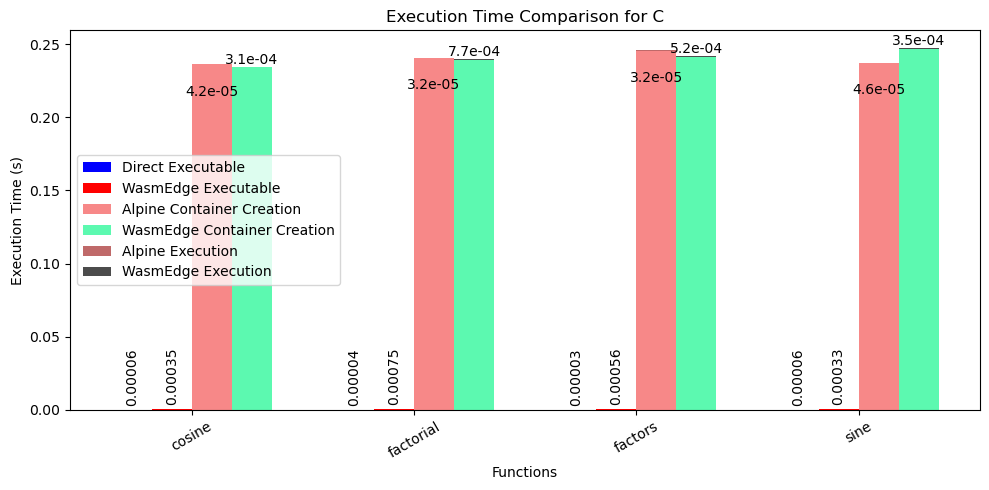

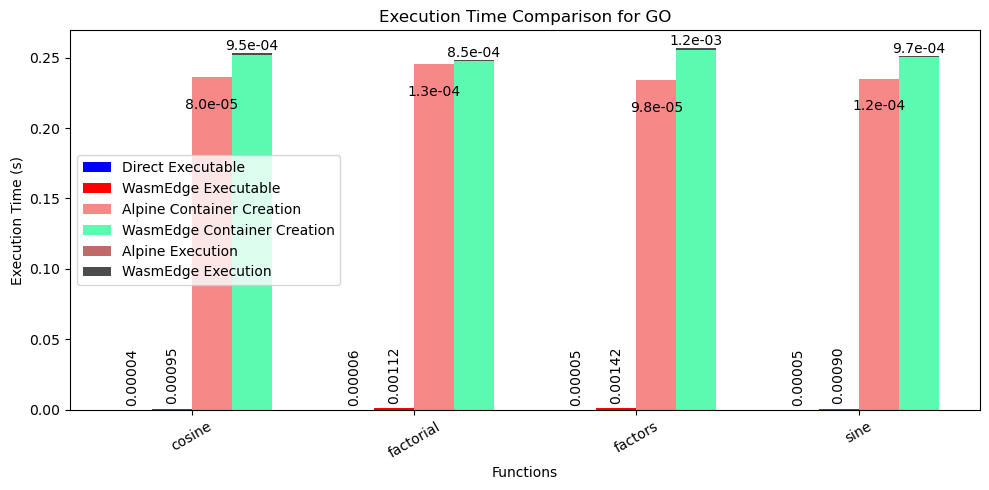

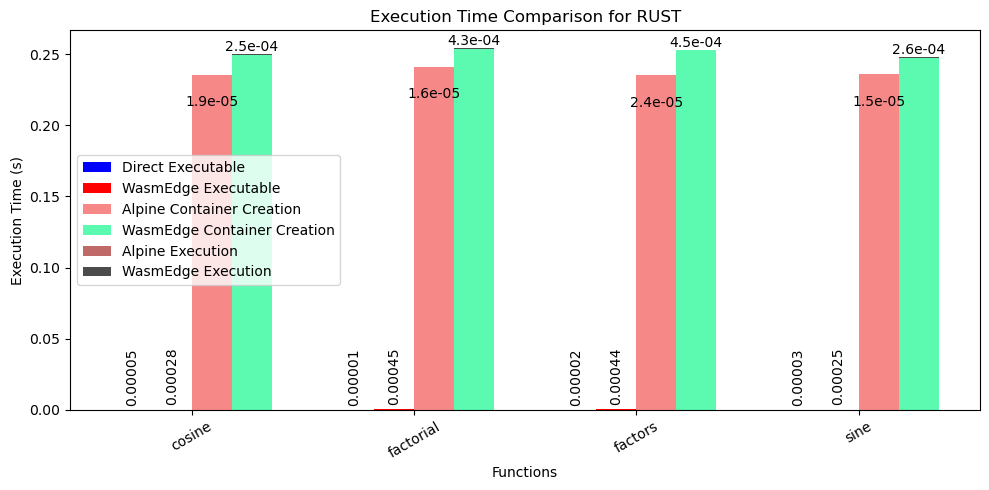

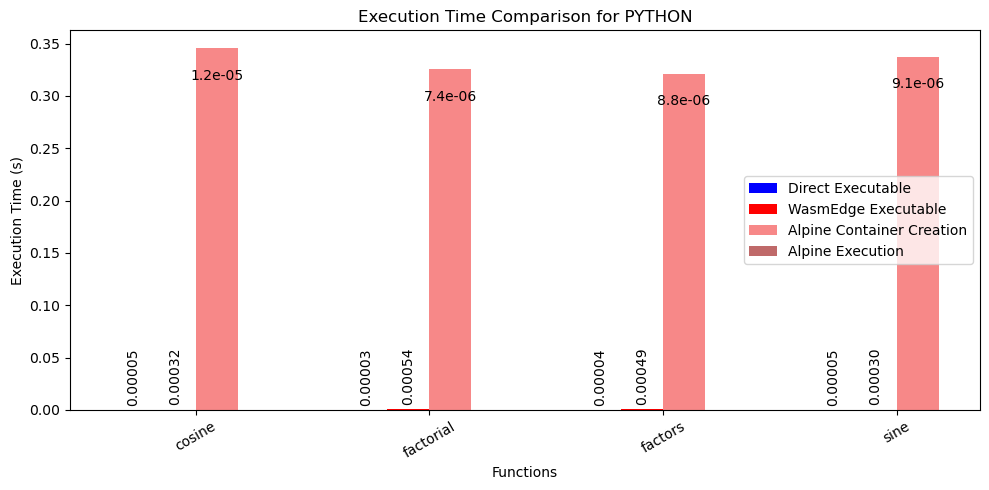

In [ ]:
# direct_executable = execution_data[execution_data['Env'] == 'executable']
# # print(direct_executable)
# print(direct_executable[direct_executable['language'] == 'go'])
# wasmedge_executable = execution_data[execution_data['Env'] == 'wasmedge']
# # print(wasmedge_executable)
# particular_lang = wasmedge_executable[wasmedge_executable['language'] == 'go']
# print(wasmedge_executable[wasmedge_executable['language'] == 'go'])
# print(particular_lang['execution_time'])
# container_data = pd.read_csv("benchmarking_results/container_benchmark_results.csv")

# print(container_data)

for lang in ["c", "go", "rust", "python"]:
    exec_data = execution_data[execution_data["language"] == lang]
    cont_data = container_data[container_data["language"] == lang]

    # Split by environment
    direct_exec = exec_data[exec_data["Env"] == "executable"].sort_values(by="function")
    wasmedge_exec = exec_data[exec_data["Env"] == "wasmedge"].sort_values(by="function")

    alpine_cont = cont_data[cont_data["Env"] == "alpine"].sort_values(by="function")
    wasmedge_cont = cont_data[cont_data["Env"] == "wasmedge/slim-runtime"].sort_values(by="function")

    # print(direct_exec)
    # print(wasmedge_exec)
    # print(alpine_cont)
    # print(wasmedge_cont)
    functions = direct_exec["function"].tolist()

    x = np.arange(4)
    bar_width = 0.18

    positions = {
        "direct": [-1.5 * bar_width],
        "alpine": [-0.5 * bar_width],
        "wasmedge": [0.5 * bar_width],
        "wasmedge_docker": [1.5 * bar_width],
        "slim_creation": [1.5 * bar_width],
        "alpine_creation": [-0.5 * bar_width],
    }


    plt.figure(figsize=(10, 5))
    bar1 = plt.bar(x + -1.5 * bar_width, direct_exec["execution_time"], bar_width, 
                   label="Direct Executable", color="blue")
    bar2 = plt.bar(x + -0.5 * bar_width, wasmedge_exec["execution_time"], bar_width, 
                   label="WasmEdge Executable", color="red")

    bar3 = plt.bar(x + 0.5 * bar_width, alpine_cont["container_creation"], bar_width,
                   label="Alpine Container Creation", color="#f56868c9")

    if not wasmedge_cont.empty:
        bar4 = plt.bar(x + 1.5 * bar_width, wasmedge_cont["container_creation"], bar_width,
                    label="WasmEdge Container Creation", color="#31f89bca")

    bar5 = plt.bar(x + 0.5 * bar_width, alpine_cont["avg_execution_time"], bar_width,
                   bottom=alpine_cont["container_creation"], 
                   label="Alpine Execution", color="brown", alpha=0.7)
    if not wasmedge_cont.empty:
        bar6 = plt.bar(x + 1.5 * bar_width, wasmedge_cont["avg_execution_time"], bar_width,
                   bottom=wasmedge_cont["container_creation"], 
                   label="WasmEdge Execution", color="black", alpha=0.7)


    # Labels and style
    plt.xlabel("Functions")
    plt.ylabel("Execution Time (s)")
    plt.title(f"Execution Time Comparison for {lang.upper()}")
    plt.xticks(x, functions, rotation=30)
    plt.legend()

    # Add values on bars
    for bars in [bar1, bar2]:
        plt.bar_label(bars, padding=3, fmt="%.5f", rotation=90)
    plt.bar_label(bar5, labels=[f"{h:.1e}" for h in alpine_cont["avg_execution_time"]], rotation=0, label_type="center", padding=-20)
    plt.bar_label(bar6, labels=[f"{h:.1e}" for h in wasmedge_cont["avg_execution_time"]], rotation=0, label_type="edge") if not wasmedge_cont.empty else None

    plt.tight_layout()
    plt.show()
